In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib_scalebar.scalebar import ScaleBar

In [2]:
# Load the shapefile
shapefile_path = "Data/Revised/Geography/MSOA/London_2021.shp"
gdf = gpd.read_file(shapefile_path)

# Load the CSV file
csv_path = "Data/Final/Dataset.csv"
df = pd.read_csv(csv_path)

# Merge the shapefile GeoDataFrame with the CSV DataFrame based on the matching codes
merged_gdf = gdf.merge(df, left_on='msoa21cd', right_on='Code_2021', how='left')

# Define a function to categorize IMD_Total values into three classes
def classify_imd(imd_value):
    if imd_value > 0:
        return 'positive'
    elif imd_value == 0:
        return 'neutral'
    else:
        return 'negative'

# Apply the classification function
merged_gdf['IMD_Category'] = merged_gdf['IMD_Total'].apply(classify_imd)

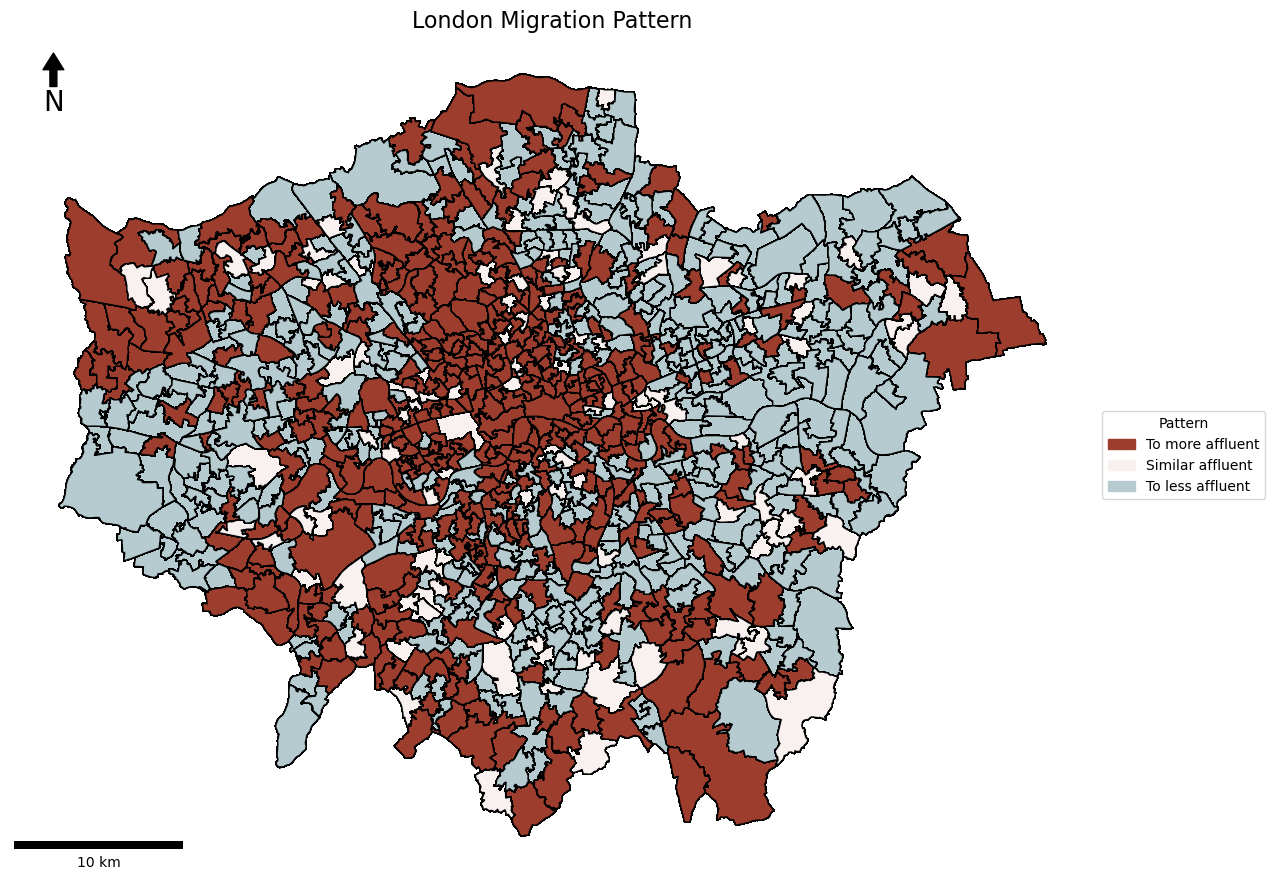

In [3]:
# Define colors for the categories
color_mapping = {
    'positive': '#9c3d2d',  # Red
    'neutral': '#f8f1ef',   # Gray for neutral
    'negative': '#b6cbd0'   # Light red for negative
}

# Map the colors to the categories
merged_gdf['color'] = merged_gdf['IMD_Category'].map(color_mapping)

# Plotting the map
ax = merged_gdf.plot(color=merged_gdf['color'], edgecolor='black', figsize=(14, 12))

# Add title and turn off axis
ax.set_title('London Migration Pattern', fontsize=16)
ax.axis('off')

# Create legend handles
legend_handles = [
    mpatches.Patch(color='#9c3d2d', label='To more affluent'),
    mpatches.Patch(color='#f8f1ef', label='Similar affluent'),
    mpatches.Patch(color='#b6cbd0', label='To less affluent')
]

# Add North arrow
x, y, arrow_length = 0.04, 0.98, 0.06
ax.annotate('N', xy=(x, y), xytext=(x, y - arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20, xycoords='axes fraction', zorder=5)

# Add scale bar with units in meters and set the background to transparent
scalebar = ScaleBar(dx=1, units="m", location='lower left', scale_loc='bottom', length_fraction=0.2, box_alpha=0)
ax.add_artist(scalebar)

# Add legend to the plot
plt.legend(handles=legend_handles, title='Pattern', loc='center left', bbox_to_anchor=(1, 0.5))

# Save the figure as an image
output_path = "Data/Migration Pattern.png"
plt.savefig(output_path, dpi=300, bbox_inches='tight', transparent=True)

plt.show()